# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

In [1]:
import requests
import requests_cache
import pandas as pd
import time

requests_cache.install_cache("mycache")

In [2]:
import time

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

In [4]:
from plotnine import *

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [2]:
#Function of read api keys
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [3]:
key = read_key("key.txt")

In [5]:
#The function of ndb_search()
def ndb_search(term):
    """The function accept the term as an argument and  return the search result items as a list 
    For 0 items, return an empty list.
    """   
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "api_key": key,
        "q": term
    })
    response.raise_for_status()
    #Use a try,except here, so for 0 items, we will get an error since the response.json()['list']['item']do not exist
    #And the function will return an empty list. More precisely, if we try someting really strange like 'abcdefg',we will
    #get empty set
    try:
        result = response.json()['list']['item']
    except:
        return []
    return result

In [6]:
help(ndb_search)

Help on function ndb_search in module __main__:

ndb_search(term)
    The function accept the term as an argument and  return the search result items as a list 
    For 0 items, return an empty list.



In [5]:
#Test my function on "quail eggs"
ndb_search("quail eggs")

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

In [6]:
#Test my function on "abcdefg"
ndb_search("abcdefg")

[]

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [10]:
fresh = pd.read_csv('fresh.csv')
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit


In [8]:
#A function that can find ndb for one food
def match_food(food):
    """The function takes food name for argument and return the first row of
    dataframe containing ndb number and other information.
    """
    
    #The following 'if and else' is for food in fresh.csv that should be searched with other names
    #==============================================
    #For example: Situation for kiwi, we will get the ndb number from kiwifruit
    if food == 'kiwi':
        results = ndb_search('kiwifruit')
        
    elif food == 'collard_greens':
        results = ndb_search('collard')
        
    elif food == 'green_beans':
        results = ndb_search('beans')
        
    elif food in ('acorn_squash','summer_squash','butternut_squash'):
        results = ndb_search('squash')
        
    elif food in ('red_peppers','green_peppers'):
        results = ndb_search('peppers')
        
    else:
        results = ndb_search(food)
        
     
    
    
    #Change the resdult into dataframe    
    results = pd.DataFrame(results)
        
    
    
    
    #Some conditions that we need to subset the dataframe
    #================================================
    is_raw = results['name'].str.contains('raw')
    is_juice = results['name'].str.contains('juice')
    is_leaves = results['name'].str.contains('leaves')
    is_fruit = results['group'].str.contains('Fruits')
    is_vegetable = results['group'].str.contains('Vegetables')
    #food should be raw,not juice,not leaves
    results = results[is_raw & ~is_juice & ~is_leaves & (is_fruit | is_vegetable)]
    
    
    
    
    
    #The following 'if and else' is for food that need other conditions to be subset.
    #==================================================================
    #Orange should have peel
    if food == 'oranges':
        is_orange_with_peel = results['name'].str.contains('with peel')
        results = results[is_orange_with_peel]
     
    #Apples should have skin
    elif food == 'apples':
        is_apple_with_skin =  results['name'].str.contains('with skin')
        results = results[is_apple_with_skin]
    
    #Beans should be green since we use beans to search green_beans
    elif food == 'green_beans':
        is_green_bean = results['name'].str.contains('green')
        results = results[is_green_bean]
    
    #The following squash should have differnt type to be subseted since we use squash without type when searching them
    elif food == 'acorn_squash':
        is_acorn = results['name'].str.contains('acorn')
        results = results[is_acorn]
        
    elif food == 'summer_squash':
        is_summer = results['name'].str.contains('summer')
        is_all_varieties = results['name'].str.contains('varieties')#it should have all varities
        results = results[is_summer&is_all_varieties]
        
    elif food == 'butternut_squash':
        is_butternut = results['name'].str.contains('butternut')
        results = results[is_butternut]
        
    #Pepper should have their types:red or green since we use pepper without type when searching them
    elif food == 'red_peppers':
        is_red = results['name'].str.contains('red')
        results = results[is_red]
        
    elif food == 'green_peppers':
        is_green = results['name'].str.contains('green')
        results = results[is_green]
        
    
    
    
    
    time.sleep(0.1)
    
    #Return the information from the dataframe
    return results.iloc[0,:]

In [9]:
help(match_food)

Help on function match_food in module __main__:

match_food(food)
    The function takes food name for argument and return the first row of
    dataframe containing ndb number and other information.



In [152]:
#Test the function
match_food('watermelon')

ds                             SR
group     Fruits and Fruit Juices
manu                         none
name              Watermelon, raw
ndbno                       09326
offset                         11
Name: 11, dtype: object

In [153]:
match_food('kiwi')

ds                             SR
group     Fruits and Fruit Juices
manu                         none
name        Kiwifruit, green, raw
ndbno                       09148
offset                          0
Name: 0, dtype: object

In [163]:
#Get the dataframe of all search terms
food_ndb = fresh['food'].apply(match_food)
food_ndb

,ds,group,manu,name,ndbno,offset
0,SR,Fruits and Fruit Juices,none,"Watermelon, raw",09326,11
1,SR,Fruits and Fruit Juices,none,"Melons, cantaloupe, raw",09181,0
2,SR,Fruits and Fruit Juices,none,"Tangerines, (mandarin oranges), raw",09218,5
3,SR,Fruits and Fruit Juices,none,"Strawberries, raw",09316,60
4,SR,Fruits and Fruit Juices,none,"Plums, raw",09279,3
5,SR,Fruits and Fruit Juices,none,"Oranges, raw, with peel",09205,93
6,SR,Fruits and Fruit Juices,none,"Raspberries, raw",09302,40
7,SR,Fruits and Fruit Juices,none,"Pomegranates, raw",09286,7
8,SR,Fruits and Fruit Juices,none,"Pineapple, raw, all varieties",09266,119
9,SR,Fruits and Fruit Juices,none,"Apricots, raw",09021,11


In [164]:
#Put the ndb number into fresh dataframe
fresh['NDB number'] = food_ndb['ndbno']
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB number
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09205
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


In [165]:
#We find that we have two cucumbers and two cabbage, and they should have different ndb number because of theri froms,let's see what happened
#This is the same process in the function except results.iloc[0,:].
results = ndb_search('cucumbers')   
results = pd.DataFrame(results)
is_raw = results['name'].str.contains('raw')
is_juice = results['name'].str.contains('juice')
is_leaves = results['name'].str.contains('leaves')
is_fruit = results['group'].str.contains('Fruits')
is_vegetable = results['group'].str.contains('Vegetables')
results = results[is_raw & ~is_juice & ~is_leaves & (is_fruit | is_vegetable)]
results

,ds,group,manu,name,ndbno,offset
0,SR,Vegetables and Vegetable Products,none,"Cucumber, with peel, raw",11205,0
1,SR,Vegetables and Vegetable Products,none,"Cucumber, peeled, raw",11206,1


In [166]:
#Now we can adjust the ndb number to match the form and group
fresh.iloc[26,7] = '11206'

In [167]:
#Do the same thing for cabbage
results = ndb_search('cabbage')   
results = pd.DataFrame(results)
is_raw = results['name'].str.contains('raw')
is_juice = results['name'].str.contains('juice')
is_leaves = results['name'].str.contains('leaves')
is_fruit = results['group'].str.contains('Fruits')
is_vegetable = results['group'].str.contains('Vegetables')
results = results[is_raw & ~is_juice & ~is_leaves & (is_fruit | is_vegetable)]
results

,ds,group,manu,name,ndbno,offset
2,SR,Vegetables and Vegetable Products,none,"Cabbage, raw",11109,2
4,SR,Vegetables and Vegetable Products,none,"Cabbage, red, raw",11112,4
5,SR,Vegetables and Vegetable Products,none,"Cabbage, savoy, raw",11114,5
8,SR,Vegetables and Vegetable Products,none,"Cabbage, chinese (pak-choi), raw",11116,8
9,SR,Vegetables and Vegetable Products,none,"Cabbage, chinese (pe-tsai), raw",11119,9
10,SR,Vegetables and Vegetable Products,none,"Cabbage, common (danish, domestic, and pointed...",11749,10
20,SR,Vegetables and Vegetable Products,none,"Cabbage, common (danish, domestic, and pointed...",11750,20


In [168]:
fresh.iloc[37,7] = '11112'

In [169]:
#Now, we get the final ndb numbers for each fruit
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB number
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09205
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


In [ ]:
#Discuss my strategy in a short paragraph:
#The general idea of my strategy is to wirte a function match_food() containig ndb_search() to find the ndb number for each
#food and then apply this function for all foods in the fresh.csv. 

#Since the foods are all raw, and after going
#through the name of some foods, I decide that the name of the food should contain 'raw'. Also, the things we get should
#not be leaves, juice. So I decide the name of the food should not contian 'leaves','juice'. Also, the group should
#contain 'Fruit' or 'Vegetable'. I use str.contain to meet these situations. 

#This idea works for the most of food except for some of them.
#For example, when I use ndb_search() on kiwi, I cannot get the right ndb number for
#kiwi. The actual name should be kiwifruit. This situation also occurs on some other fruit. So, in my match_food()
#function, I use if-else to change the name of food that we want to use in ndb_search() for all these situations.

#Also, we should also add some restrictions on the name, otherwise we will get an wrong ndb numebr for some of them.
#For example, the name of oranges should contain 'with peel', otehriwse, we will get the ndb numebr for some other tings
#like orange peels. For this kind of problem, I use if-else to add limits to the name.

#After geting the ndb numebr and adding it to the dataframe of freah, I find some of fruit have the same name and the
#same ndb numebr -- cucumber and cabbage. After looking at the form of them, I get the dataframe of all kinds of 
#cucumber and cabbage that meets the requirement, and adjust the ndb number for cucumber and cabbage by matching the form
#in dataframe of fresh with the group in the dataframe of all kinds of cucumber and cabbage that meets the requirement.

#Finally, I get all ndb numebrs of food in dataframe 'fresh'.

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [10]:
#The function of ndb_report()
def ndb_report(NDB):
    """The function accept the NDB number as an argument and return the list of nutrients for the food.
    """
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
       "api_key": key,
       "ndbno": NDB
    })
    response.raise_for_status()
    #get the list of nutrients for the food
    result = response.json()['foods'][0]['food']['nutrients']
    
    return result


In [11]:
help(ndb_report)

Help on function ndb_report in module __main__:

ndb_report(NDB)
    The function accept the NDB number as an argument and return the list of nutrients for the food.



In [172]:
#Test my function on "09279"
test_list = ndb_report("09279")
test_list

[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


In [173]:
#Check the first element of the returned list.
test_list[0]
#It is the same as the example.

{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}

__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

In [ ]:
#1.Are fruits typically higher in kilocalories, or vegetables?

In [190]:
#A function that is used to find the value of kilocalories for each ndb numebr.
def kilocalories(ndb):
    
    time.sleep(0.1)
    
    #The kilocalories is in the 'value' of the second element in the returned list by nbd_report
    return ndb_report(ndb)[1]['value']

In [210]:
calories = fresh['NDB number'].apply(kilocalories)
calories = calories.apply(float)
calories

0      30.0
1      34.0
2      53.0
3      32.0
4      46.0
5      63.0
6      52.0
7      83.0
8      50.0
9      48.0
10     36.0
11     43.0
12     61.0
13     50.0
14     89.0
15     52.0
16     39.0
17     44.0
18     57.0
19     37.0
20     43.0
21     57.0
22     57.0
23     60.0
24     20.0
25     15.0
26     10.0
27     14.0
28     40.0
29     32.0
30     27.0
31     77.0
32     32.0
33     31.0
34     40.0
35     26.0
36     25.0
37     31.0
38     86.0
39     16.0
40     16.0
41     45.0
42    167.0
43     35.0
44     47.0
45     33.0
46     20.0
47     43.0
48     86.0
Name: NDB number, dtype: float64

In [211]:
fresh['kilocalories'] = calories

In [391]:
#Calculate the mean for each
mean1 = fresh[fresh['type'] == 'fruit']['kilocalories'].mean()
mean2 = fresh[fresh['type'] != 'fruit']['kilocalories'].mean()
[mean1,mean2]

[50.666666666666664, 40.56]

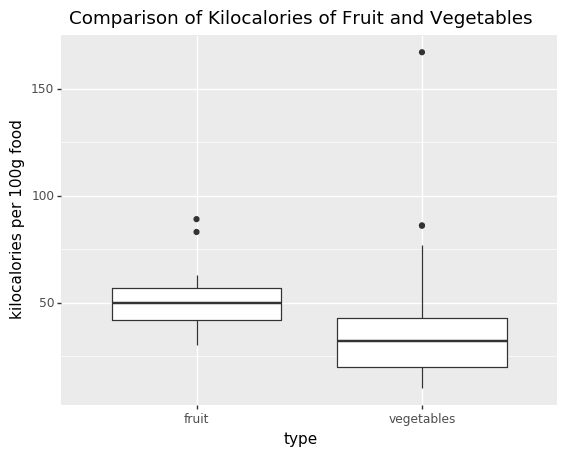

<ggplot: (-9223372029292962623)>

In [327]:
(
    ggplot(fresh, aes("type","kilocalories")) + geom_boxplot() +
    labs(title = "Comparison of yield of Fruit and Vegetables",y = 'g per 100g food')
)

In [ ]:
#Are fruits typically higher in kilocalories, or vegetables?

#Answer: The mean of kilocalories of fruit is 50.6 kcal per 100g food, and the mean for vegetables is 40.56 kcal 
#per 100g food. Obviously, the average kilocalories of fruit is higher than that of vegetables. 

#Moreover, in the above boxplot of kilocalries of fruit of vegetables, we can see that the median value of kilocalories
#of fruit is also higher than that of vegetables. In addition, from the plot, we can see that most fruit have higher
#kilocalories than vegetables since the 25 percentile line of fruit is close to the 75 percentile line of vegetables.
#However, there are some exceptions. More precisely, we can see that some vegetables have really high kilocalories, which
#is higher than most of fruit. By looking at the dataset, these vegetables are avocados, sweet potatos, and sweet corns.

#Furthermore, the standard deviation of kilocalories of vegetables is higher than that of friut. This means that the 
#kilocalories of vegetables varies more differently than that of fruit.

In [ ]:
#How does yield for fibrous foods (high in dietary fiber) compare to other foods?

In [234]:
#A function that is used to find the value of dietary fiber for each ndb numebr.
def fiber(ndb):
    
    time.sleep(0.1)
    
    #The kilocalories is in the 'value' of the second element in the returned list by nbd_report
    return ndb_report(ndb)[5]['value']

In [242]:
dietary_fiber = fresh['NDB number'].apply(fiber)
dietary_fiber = dietary_fiber.apply(float)

In [243]:
fresh['dietary fiber'] = dietary_fiber

In [244]:
dietary_fiber.sort_values(ascending=True)
#sort values of dietary fiber. Since we have 49 food, so it is reasonable to take around 10 food with highest
#dietary fiber as fibrous food. And we see 3.8 and 3.2 have an obvious difference for the 11th and 12th, so we can take
#11 food, which dietary fiber is higher than 3.8 as fibrous food.

0      0.4
25     0.5
26     0.7
10     0.8
1      0.9
39     1.1
27     1.2
4      1.4
8      1.4
34     1.5
16     1.5
23     1.6
13     1.6
40     1.6
17     1.7
28     1.7
46     1.7
11     1.7
2      1.8
9      2.0
41     2.0
3      2.0
37     2.1
35     2.1
31     2.1
24     2.1
22     2.4
15     2.4
36     2.5
14     2.6
48     2.7
33     2.7
38     3.0
12     3.0
18     3.1
29     3.2
45     3.2
30     3.2
47     3.8
21     3.9
7      4.0
32     4.0
43     4.1
5      4.5
20     5.3
44     5.4
6      6.5
42     6.8
19    12.0
Name: NDB number, dtype: float64

In [370]:
fresh['fiber_type'] = None
fresh.loc[fresh['dietary fiber']>= 3.8,'fiber_type'] = 'fibrous'
fresh.loc[fresh['dietary fiber'] < 3.8,'fiber_type'] = 'not fibrous'

In [371]:
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB number,kilocalories,dietary fiber,fiber type,fiber_type
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326,30.0,0.4,not fibrous,not fibrous
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181,34.0,0.9,not fibrous,not fibrous
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218,53.0,1.8,not fibrous,not fibrous
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316,32.0,2.0,not fibrous,not fibrous
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279,46.0,1.4,not fibrous,not fibrous
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09205,63.0,4.5,fibrous,fibrous
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302,52.0,6.5,fibrous,fibrous
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286,83.0,4.0,fibrous,fibrous
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266,50.0,1.4,not fibrous,not fibrous
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021,48.0,2.0,not fibrous,not fibrous


In [372]:
#Calcluate the mean for each
mean1 = fresh.loc[fresh['dietary fiber']>= 3.8,'yield'].mean()
mean2 = fresh.loc[fresh['dietary fiber']< 3.8,'yield'].mean()
[mean1,mean2]


[0.8178238039014999, 0.7703274733943726]

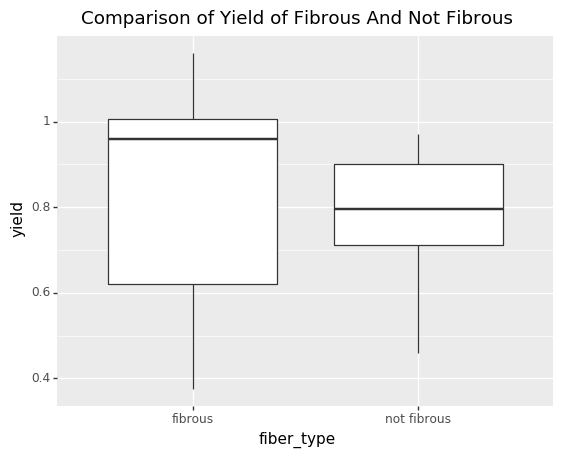

<ggplot: (-9223372029289446631)>

In [392]:
(
    ggplot(fresh, aes(x = "fiber_type",y = "yield")) + geom_boxplot() +
    labs(title = "Comparison of Yield of Fibrous And Not Fibrous")
)

In [ ]:
#How does yield for fibrous foods (high in dietary fiber) compare to other foods?
#Answer: Fisrt of all, we should define fibrous food in our data set.
#Since we have 49 food, so it is reasonable to take around 10 food with highest dietary fiber as fibrous food.
#And we see 3.8 and 3.2 have an obvious difference for the 11th and 12th, so we can take 11 food, which dietary fiber is
#higher than 3.8 as fibrous food.

#The mean of yield for fibrous food is 0.818; the mean of yield  for other food is 0.770. Obviously, the average yield
#of fibrous food is higher than that of other food. From the boxplot, we can see that the median of yield for fibrous
#food is also higher than that of other food. In adddition, the standarad deviation of fibrous food is larger than
#that of other food. It means that the yield of fibrous food varies more differently than that of other food. More precisely,
#in this boxplot, the 25 percentile of yield of fibrous food is lower than that of other food, but the 75 percentile
#of fibrous food is higher than that of other food.

#Therefore, in this problem, although we can say that the mean of yileld for fibrous food is higher than that of other food,
#We cannot conclude that the yield for fibrous food is typically higher than that of other food. It is also because the 
#sample size is too small.
